<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span></li><li><span><a href="#Train-&amp;-Test-sets" data-toc-modified-id="Train-&amp;-Test-sets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Train &amp; Test sets</a></span></li><li><span><a href="#Regression-Model" data-toc-modified-id="Regression-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Regression Model</a></span><ul class="toc-item"><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#Sigmoid-(logistic)" data-toc-modified-id="Sigmoid-(logistic)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Sigmoid (logistic)</a></span></li><li><span><a href="#Tanh" data-toc-modified-id="Tanh-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Tanh</a></span></li></ul></li><li><span><a href="#Relu" data-toc-modified-id="Relu-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Relu</a></span></li></ul></li></ul></div>

# Data Prep

In [1]:
import os.path
import numpy as np
import pandas as pd
from math import sqrt
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA as sklearnPCA 
from sklearn.manifold import TSNE
from sklearn import manifold,decomposition
from sklearn import metrics

In [2]:
df = pd.read_csv("df.csv")
df2021 = pd.read_csv("2021.csv")

In [3]:
df.head()

,Unnamed: 0,year,avg_driv_dist,driv_acc%,gir%,scrambling%,sandsaves,putting_avg,score
0,0,2019,316.3,67.86,66.67,79.17,63.64,1.771,-11
1,1,2019,314.4,58.93,62.50,40.74,25.00,1.689,-5
2,2,2019,313.6,55.36,62.50,51.85,20.00,1.822,-3
3,3,2019,313.6,69.64,73.61,68.42,100.00,1.792,-12
4,4,2019,312.3,73.21,76.39,70.59,50.00,1.818,-8


In [4]:
df2021.head()

,Unnamed: 0,year,avg_driv_dist,driv_acc%,gir%,scrambling%,sandsaves,putting_avg,score
0,0,2021,324.4,71.43,62.50,48.15,20.0,1.822,1
1,1,2021,323.6,55.36,61.11,53.57,20.0,1.841,5
2,2,2021,316.5,58.93,61.11,46.43,0.0,1.773,4
3,3,2021,315.6,75.00,69.44,68.18,75.0,1.840,-6
4,4,2021,315.1,58.93,66.67,54.17,100.0,1.854,4


In [5]:
df2 = df[['year','avg_driv_dist', 'driv_acc%', 'gir%', 'scrambling%','sandsaves', 'putting_avg']]

In [6]:
sklearn_pca = sklearnPCA(n_components=2)

In [7]:
Y_sklearn = sklearn_pca.fit_transform(df2)

In [8]:
Y_sklearn

array([[ 18.83569479, -26.96708765],
       [-25.97304442, -32.34827421],
       [-29.03424609, -31.01193193],
       ...,
       [ -8.21790615,  22.40039624],
       [ 20.08452844,  23.26666602],
       [ -9.62406781,  21.00627429]])

In [9]:
df.groupby('year')['score'].min()

year
2003   -11
2004    -9
2005   -12
2006    -7
2008    -8
2009   -12
2010   -16
2011   -14
2012   -10
2013    -9
2014    -8
2015   -18
2016    -5
2017    -9
2018   -15
2019   -13
Name: score, dtype: int64

In [10]:
min_indexes = df.loc[df.groupby('year')['score'].idxmin()].index

In [11]:
df.groupby('year')['score'].max()

year
2003    17
2004    16
2005    18
2006    12
2008    14
2009    10
2010    14
2011     6
2012    18
2013    16
2014    16
2015     9
2016    19
2017    20
2018    10
2019     8
Name: score, dtype: int64

In [12]:
max_indexes = df.loc[df.groupby('year')['score'].idxmax()].index

In [13]:
Y_sklearn

array([[ 18.83569479, -26.96708765],
       [-25.97304442, -32.34827421],
       [-29.03424609, -31.01193193],
       ...,
       [ -8.21790615,  22.40039624],
       [ 20.08452844,  23.26666602],
       [ -9.62406781,  21.00627429]])

In [14]:
winnersco = [] 

for i in max_indexes:
    winnersco.append(Y_sklearn[i])

In [15]:
winnersco

[array([50.56950748, 12.0578569 ]),
 array([ 1.38537793, 11.07356601]),
 array([-37.32633209,  17.94561387]),
 array([19.53736063, 23.23934629]),
 array([-14.15848542,  -2.91690017]),
 array([ -4.09738339, -16.5341203 ]),
 array([13.19968961,  7.53302568]),
 array([-17.70237892,   2.23888465]),
 array([ 5.55196452, 11.10891541]),
 array([-17.82370224, -17.86329336]),
 array([35.37104371, 26.87754523]),
 array([-17.50026251,  -6.55774934]),
 array([-8.79443906, 12.11602625]),
 array([-30.65195199,  -2.26002886]),
 array([7.69542193, 8.41947198]),
 array([  2.4787956, -16.1847736])]

In [16]:
worstco = [] 

for i in min_indexes:
    worstco.append(Y_sklearn[i])

In [17]:
worstco

[array([-7.66467983, 15.22606874]),
 array([-11.33351373,  -0.07525006]),
 array([ -8.22936983, -11.97927552]),
 array([-14.23761774, -13.99634073]),
 array([23.04266198,  6.48494898]),
 array([55.0224507 ,  2.94956122]),
 array([-43.80818613,  -9.8836279 ]),
 array([-1.05824983,  7.13879759]),
 array([ 3.22329602, -0.57159012]),
 array([-45.04113643, -10.54601165]),
 array([-21.6027868 , -16.32424758]),
 array([3.97988289, 0.57290806]),
 array([-44.51129931,   7.77940045]),
 array([36.81742253, -5.29745667]),
 array([  2.97706863, -12.06435794]),
 array([ 17.16200844, -18.02318547])]

In [18]:
Y_sklearn

array([[ 18.83569479, -26.96708765],
       [-25.97304442, -32.34827421],
       [-29.03424609, -31.01193193],
       ...,
       [ -8.21790615,  22.40039624],
       [ 20.08452844,  23.26666602],
       [ -9.62406781,  21.00627429]])

In [19]:
xco, yco = zip(*Y_sklearn)

In [20]:
worstxco, worstyco = zip(*worstco)

In [21]:
winnersxco, winnersyco = zip(*winnersco)

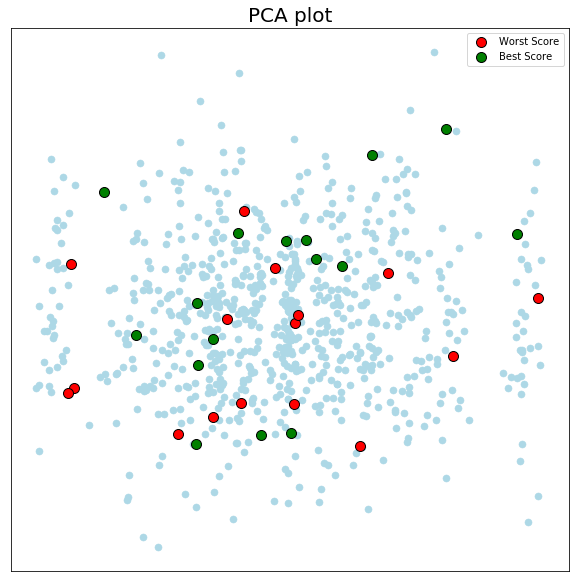

In [22]:
plt.figure(figsize=(10,10))
plt.title('PCA plot', size=20)
plt.scatter(x=xco, y=yco, lw=0.5,s=50,c='#ADD8E6')
plt.scatter(x=worstxco, y=worstyco,c='r',s=100,edgecolors='k',label="Worst Score")
plt.scatter(x=winnersxco, y=winnersyco,c='green',s=100,edgecolors='k',label="Best Score")
plt.xticks([], [])
plt.yticks([], [])
plt.legend()
plt.show()

In [23]:
tsne = manifold.TSNE(n_components=2, init='random',
                         random_state=0, perplexity=30, learning_rate=500)
tsne_res = tsne.fit_transform(Y_sklearn)

In [24]:
worstco = [] 

for i in max_indexes:
    worstco.append(tsne_res[i])
    
worstxco, worstyco = zip(*worstco)

In [25]:
winnersco = [] 

for i in min_indexes:
    winnersco.append(tsne_res[i])
    
winnersxco, winnersyco = zip(*winnersco)

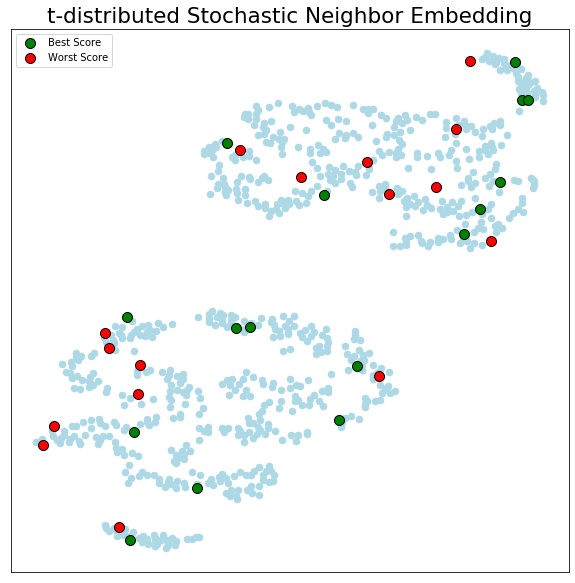

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(tsne_res[:, 0], tsne_res[:, 1],lw=0.5,s=50,c='#ADD8E6')
plt.scatter(winnersxco, winnersyco,c='green',s=100,edgecolors='k',label="Best Score")
plt.scatter(worstxco, worstyco,c='r',s=100,edgecolors='k',label="Worst Score")
plt.title('t-distributed Stochastic Neighbor Embedding',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.legend()
plt.show()

In [27]:
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, 
                   dissimilarity="euclidean", n_jobs=1, random_state=10)

In [28]:
pos = mds.fit(Y_sklearn).embedding_

In [29]:
worstco = [] 

for i in max_indexes:
    worstco.append(pos[i])
    
worstxco, worstyco = zip(*worstco)

In [30]:
winnersco = [] 

for i in min_indexes:
    winnersco.append(pos[i])
    
winnersxco, winnersyco = zip(*winnersco)

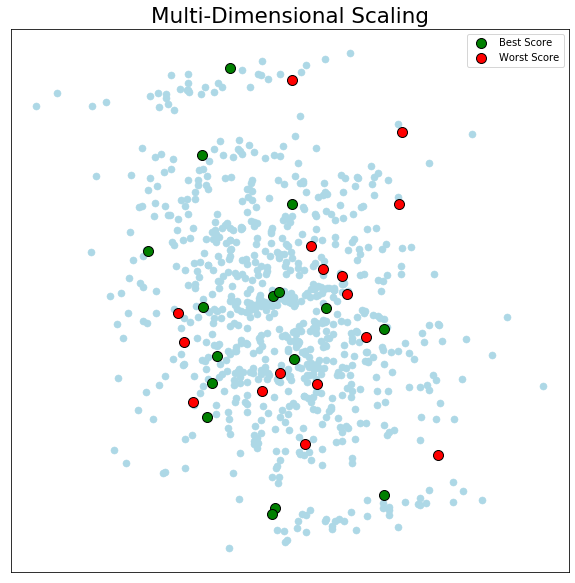

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(pos[:, 0], pos[:, 1], lw=0.5,s=50,c='#ADD8E6')
plt.scatter(winnersxco, winnersyco,c='green',s=100,edgecolors='k',label="Best Score")
plt.scatter(worstxco, worstyco,c='r',s=100,edgecolors='k',label="Worst Score")
plt.title('Multi-Dimensional Scaling',size=21.5)
plt.xticks([], [])
plt.yticks([], [])
plt.legend()
plt.show()

# Train & Test sets

In [32]:
X_train = df[['avg_driv_dist', 'driv_acc%', 'gir%', 'scrambling%','sandsaves', 'putting_avg']]
y_train = df['score']

# Regression Model

In [33]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
X = df2021[['avg_driv_dist', 'driv_acc%', 'gir%', 'scrambling%','sandsaves', 'putting_avg']]
y = df2021['score']

In [35]:
predictions2021 = regr.predict(X).round()

In [36]:
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})

In [37]:
pred_df.head()

,Actual,Predicted
0,1,2.0
1,5,2.0
2,4,2.0
3,-6,-6.0
4,4,-0.0


In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 1.6153846153846154
Mean Squared Error: 4.346153846153846
Root Mean Squared Error: 2.0847431127488694


In [39]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [40]:
regr.coef_

array([-6.15309851e-02, -6.47448414e-05, -5.25364095e-01, -2.75285766e-01,
       -5.99641059e-04,  4.13970408e+01])

Feature: 0, Score: -0.06153
Feature: 1, Score: -0.00006
Feature: 2, Score: -0.52536
Feature: 3, Score: -0.27529
Feature: 4, Score: -0.00060
Feature: 5, Score: 41.39704


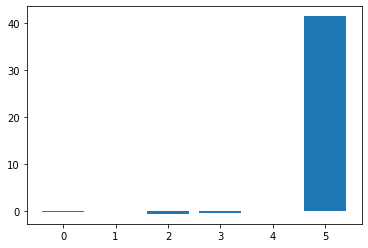

In [41]:
from matplotlib import pyplot
# get importance
importance = regr.coef_
# summarize feture importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
real_df = pred_df.sort_values(by='Actual').head(10)
real_df['Player'] = real_df.index
names = pd.read_csv("2021_with_names.csv")
names['Player'] = names['Unnamed: 0.1']
player_dict = names['Player'].to_dict()
real_df['Player'] = real_df['Player'].map(player_dict)
real_df[['Player','Actual','Predicted']]

,Player,Actual,Predicted
45,Hideki Matsuyama,-10,-9.0
23,Will Zalatoris,-9,-9.0
39,Jordan Spieth,-7,-9.0
8,Xander Schauffele,-7,-7.0
30,Marc Leishman,-6,-5.0
3,Jon Rahm,-6,-6.0
42,Justin Rose,-5,-3.0
32,Corey Conners,-4,-2.0
18,Patrick Reed,-4,-3.0
29,Cameron Smith,-3,-4.0


In [43]:
predictions_df = pred_df.sort_values(by='Predicted').head(10)
predictions_df['Player'] = predictions_df.index
predictions_df['Player'] = predictions_df['Player'].map(player_dict)
predictions_df[['Player','Actual','Predicted']]

,Player,Actual,Predicted
39,Jordan Spieth,-7,-9.0
23,Will Zalatoris,-9,-9.0
45,Hideki Matsuyama,-10,-9.0
8,Xander Schauffele,-7,-7.0
3,Jon Rahm,-6,-6.0
30,Marc Leishman,-6,-5.0
5,Justin Thomas,0,-4.0
40,Kevin Na,-2,-4.0
29,Cameron Smith,-3,-4.0
41,Brian Harman,-2,-3.0


6/10 correct

## Neural Network

### Sigmoid (logistic)

In [44]:
model = MLPRegressor(activation='logistic')

In [45]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [46]:
predictions2021 = model.predict(X).round()

In [47]:
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head(10)

,Actual,Predicted
0,1,8.0
1,5,5.0
2,4,6.0
3,-6,-1.0
4,4,3.0
5,0,2.0
6,2,5.0
7,7,8.0
8,-7,1.0
9,11,8.0


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 3.4423076923076925
Mean Squared Error: 18.326923076923077
Root Mean Squared Error: 4.28099557076658


In [49]:
model.get_params()

{'activation': 'logistic',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Tanh

In [50]:
model = MLPRegressor(activation='tanh')
model.fit(X_train, y_train)
predictions2021 = model.predict(X).round()
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head(10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Actual,Predicted
0,1,8.0
1,5,4.0
2,4,6.0
3,-6,-0.0
4,4,3.0
5,0,2.0
6,2,5.0
7,7,9.0
8,-7,1.0
9,11,8.0


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 3.5576923076923075
Mean Squared Error: 19.134615384615383
Root Mean Squared Error: 4.374313132894739


In [52]:
model.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

## Relu

In [53]:
model = MLPRegressor(activation='relu')
model.fit(X_train, y_train)
predictions2021 = model.predict(X).round()
pred_df = pd.DataFrame({'Actual': y, 'Predicted': predictions2021})
pred_df.head(10)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Actual,Predicted
0,1,9.0
1,5,6.0
2,4,7.0
3,-6,-0.0
4,4,3.0
5,0,2.0
6,2,6.0
7,7,8.0
8,-7,2.0
9,11,9.0


In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions2021))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions2021))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions2021)))

Mean Absolute Error: 3.5
Mean Squared Error: 18.346153846153847
Root Mean Squared Error: 4.283241044600905


In [55]:
model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}